In [53]:
#Importing packages

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from statsmodels.stats.mediation import Mediation
from statsmodels.stats.outliers_influence import variance_inflation_factor

logisticRegression= LogisticRegression()

# Data Preparation

In [54]:
hr = pd.read_csv('turnover.csv') #Importing the csv
hr['department'] = hr['sales'] #Renaming the column to avoid confusion.
del hr['sales']
#Turning the salary column into categorical integers.
hr.loc[(hr.salary == 'low'),'salary']='1'
hr.loc[(hr.salary == 'medium'),'salary']='2'
hr.loc[(hr.salary == 'high'),'salary']='3'

In [55]:
sales = pd.get_dummies(hr['department'])
#Getting get_dummies of the sales column to create new columns, one for each department.

In [56]:
hr_data = pd.concat([hr, sales], axis=1) #Concatenating the sales and the hr dfs into a new df, hr_data.
del hr_data['department'] #deleting unneeded column
hr_data['salary'] = hr_data['salary'].astype('int64')
hr_data.groupby(['left']).mean()
#Using the groupby to see the difference in all columns by those who have stayed and left their company.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


In [57]:
predictors = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
              'Work_accident', 'promotion_last_5years', 'sales', 'salary', 'IT', 'RandD', 'accounting', 'hr', 'management',
              'marketing', 'product_mng', 'support', 'technical'] #Creating a list of predictors.
for predictor in predictors:
    if predictor == 'sales':
            corr, _ = pearsonr(hr_data[predictor].astype('float'), hr_data['left'])
    print(predictor + ": ")
    corr, _ = pearsonr(hr_data[predictor], hr_data['left'])
    print(round(corr, 3))
#Correlation tests

satisfaction_level: 
-0.388
last_evaluation: 
0.007
number_project: 
0.024
average_montly_hours: 
0.071
time_spend_company: 
0.145
Work_accident: 
-0.155
promotion_last_5years: 
-0.062
sales: 
0.01
salary: 
-0.158
IT: 
-0.011
RandD: 
-0.047
accounting: 
0.015
hr: 
0.028
management: 
-0.046
marketing: 
-0.001
product_mng: 
-0.011
support: 
0.011
technical: 
0.02


In [58]:
corr = hr_data.corr() #Seeing how all variables correlate with one another.

corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.010959,0.002800,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630
IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,-0.010959,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484


In [59]:
vif_data = hr_data.copy() #Creating a new df to look for multcollinearity.

del_column = []

for column in list(vif_data.columns[9:]):
    del_column.append(column)

for column in del_column:
    del vif_data[column]
    
vif_data.columns

del vif_data['left'] #Deleting the target column.

X = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']] #Showing predictors
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,satisfaction_level,6.502732
1,last_evaluation,20.260156
2,number_project,13.861461
3,average_montly_hours,19.324363
4,time_spend_company,6.714344
5,Work_accident,1.172676
6,promotion_last_5years,1.037101
7,salary,6.393250


In [60]:
#Creating two different dfs based on left status.
left0 = hr_data[hr_data['left']==0]
left1 = hr_data[hr_data['left']==1]

In [61]:
left1.describe()
#Reviewing information to see differences between the two dfs.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321,1.414730,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759,0.537341,0.265753,0.180956,0.232117,0.237904,0.157609,0.231582,0.228882,0.450978,0.362354,0.396397
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
left1.describe()
#Reviewing information to see differences between the two dfs.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321,1.414730,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759,0.537341,0.265753,0.180956,0.232117,0.237904,0.157609,0.231582,0.228882,0.450978,0.362354,0.396397
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


satisfaction_level: 


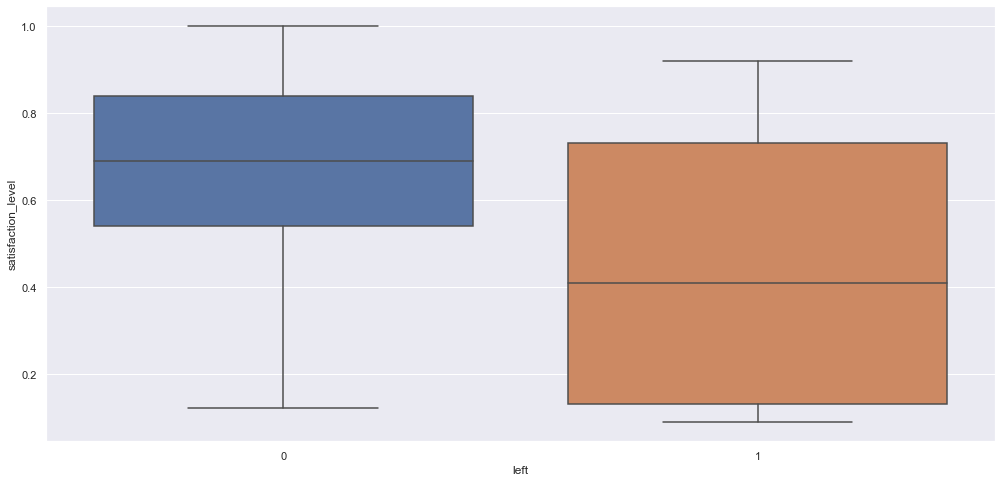

last_evaluation: 


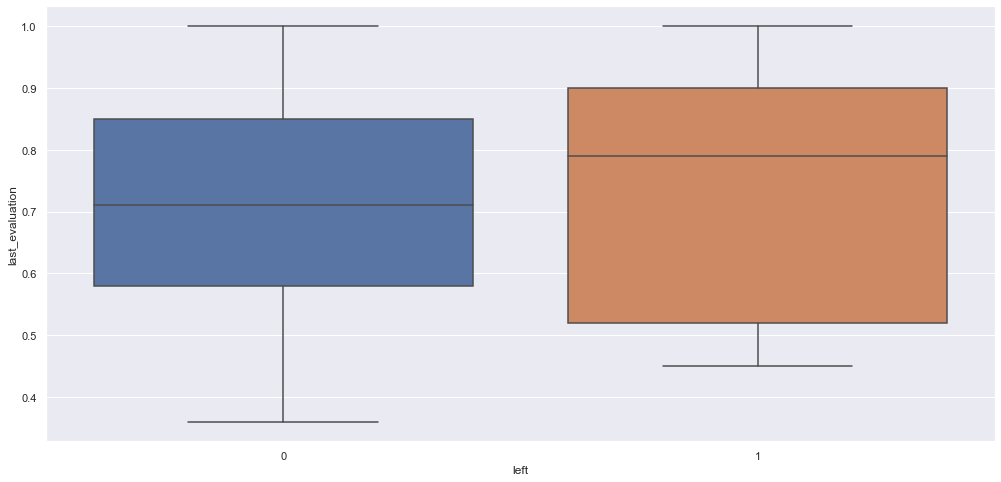

number_project: 


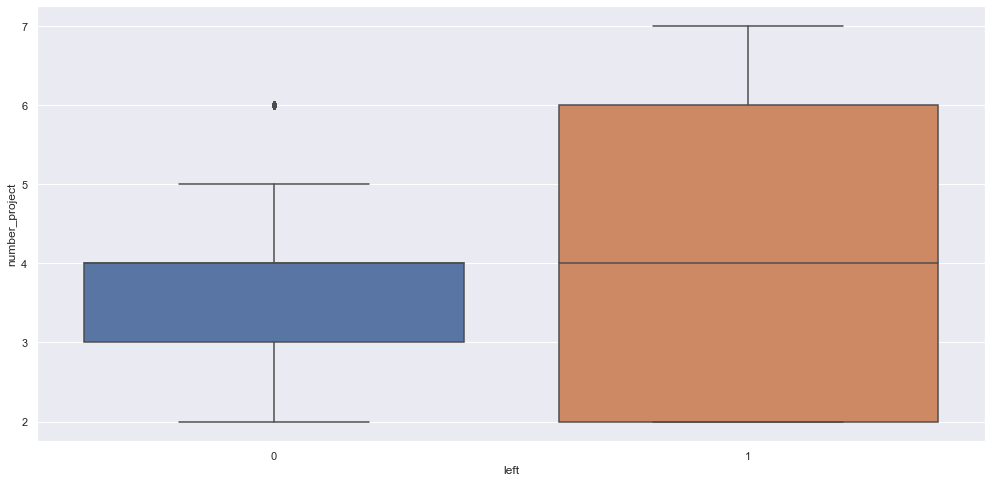

average_montly_hours: 


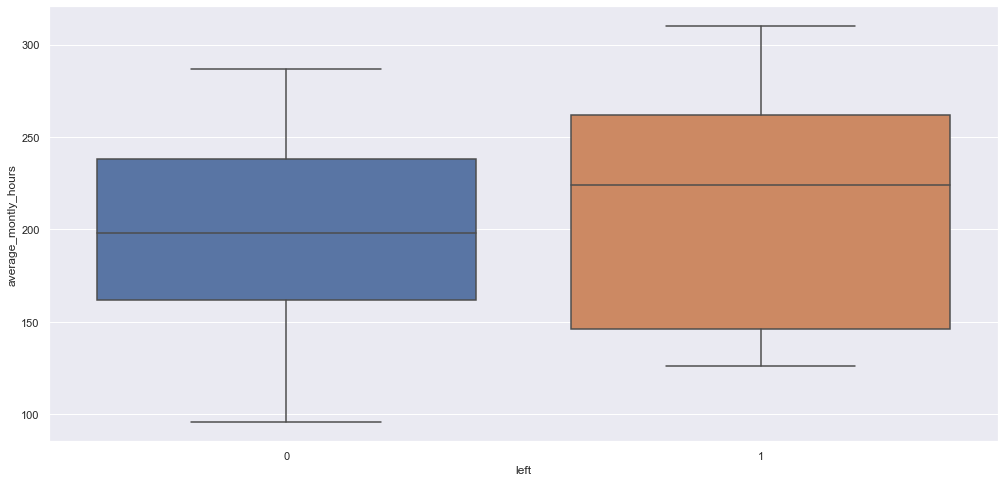

time_spend_company: 


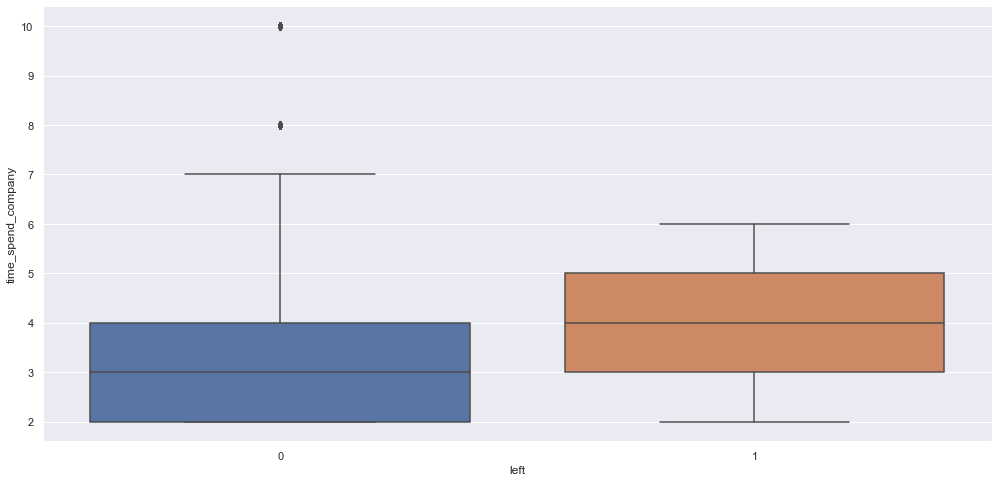

Work_accident: 


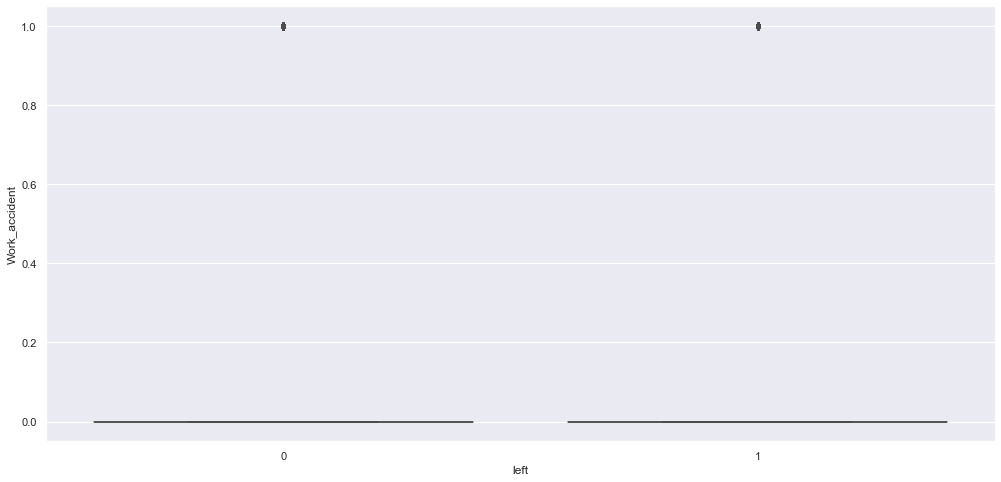

promotion_last_5years: 


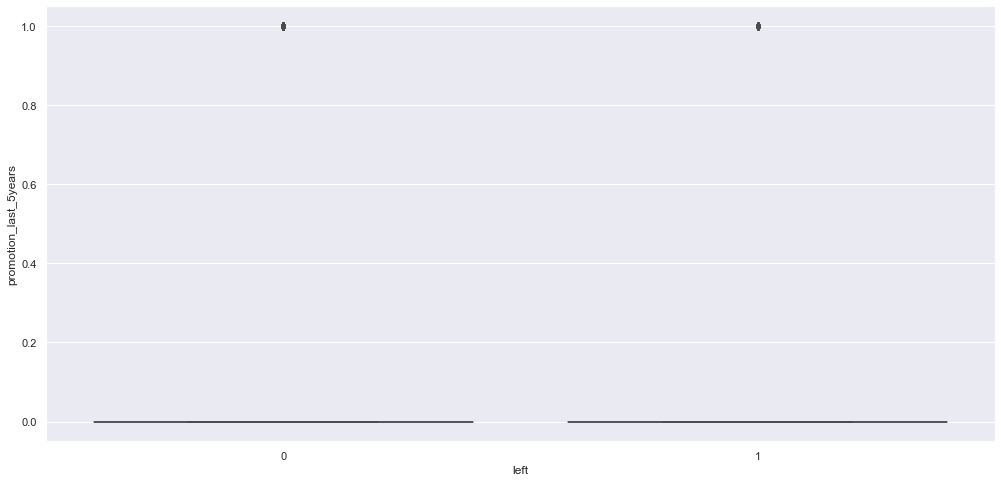

sales: 


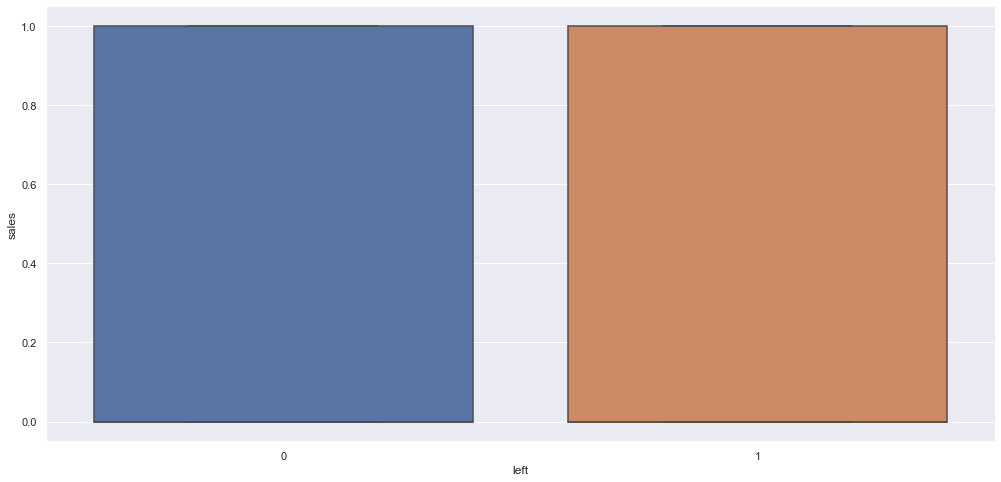

salary: 


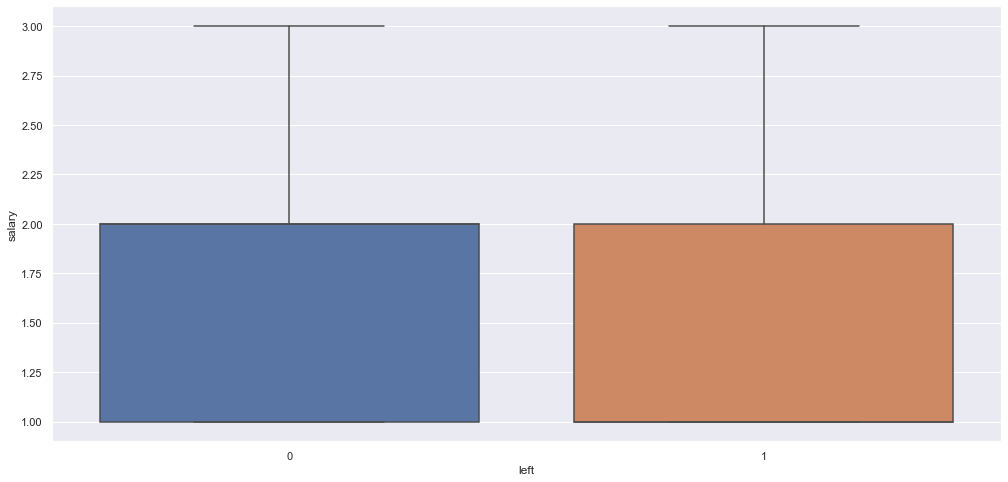

IT: 


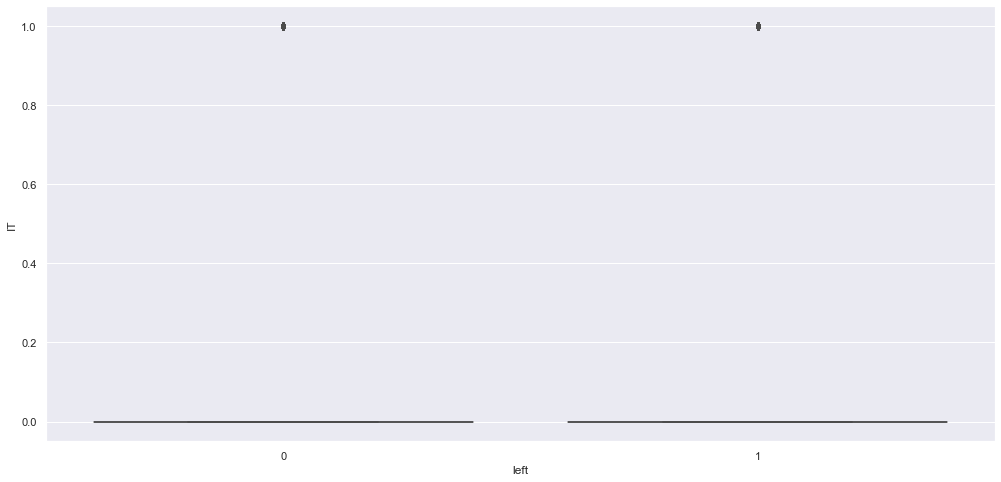

RandD: 


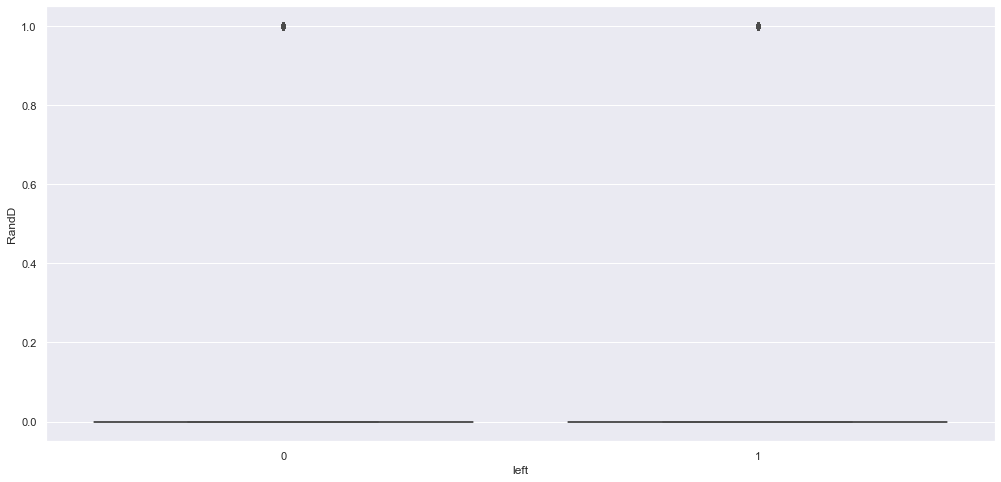

accounting: 


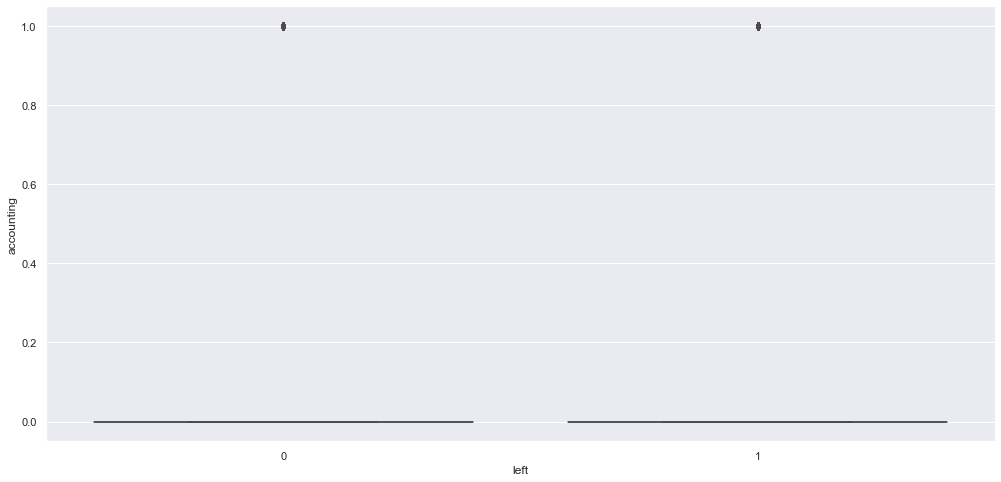

hr: 


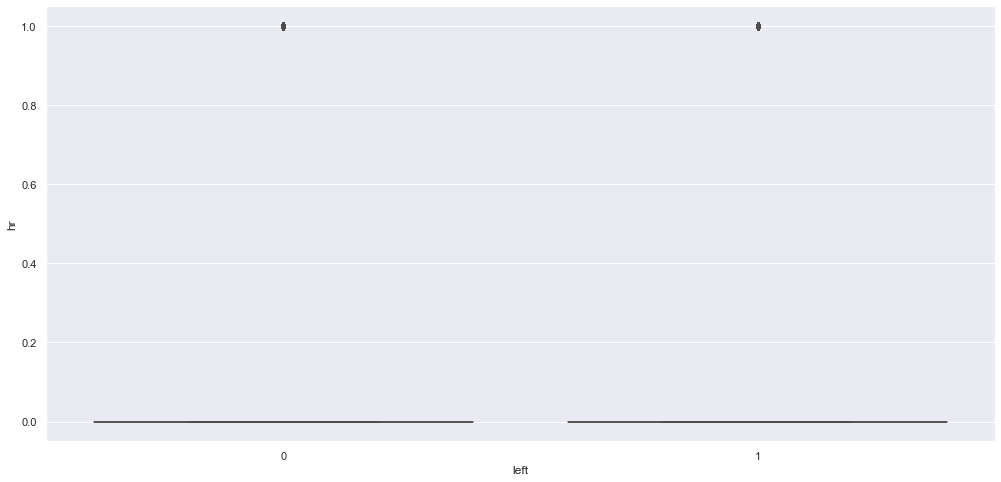

management: 


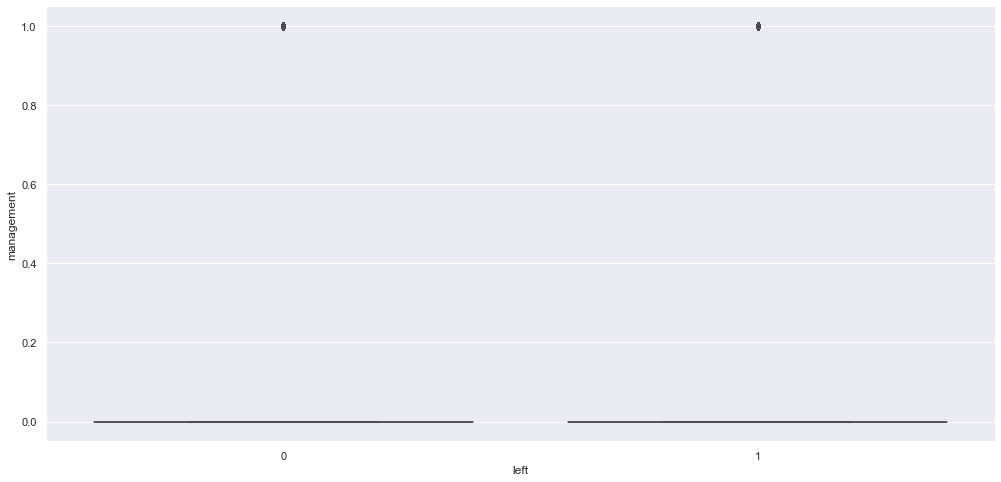

marketing: 


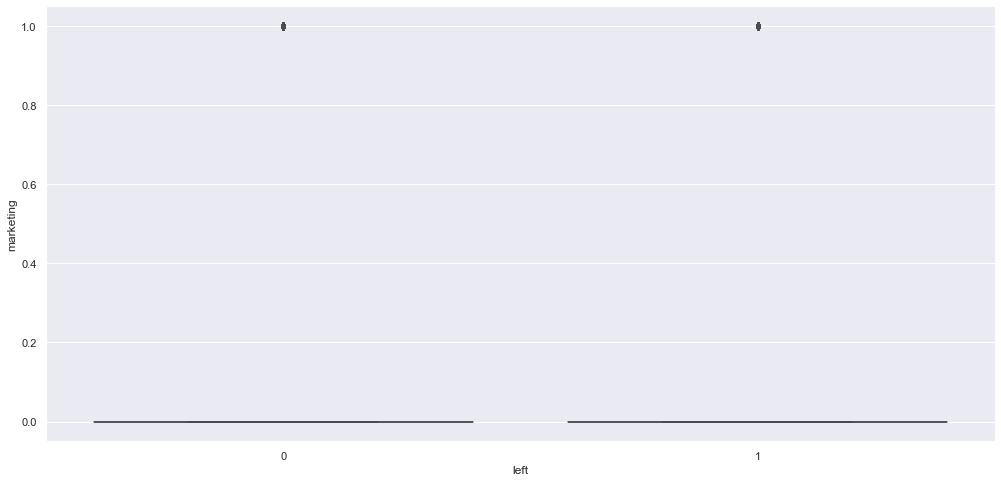

product_mng: 


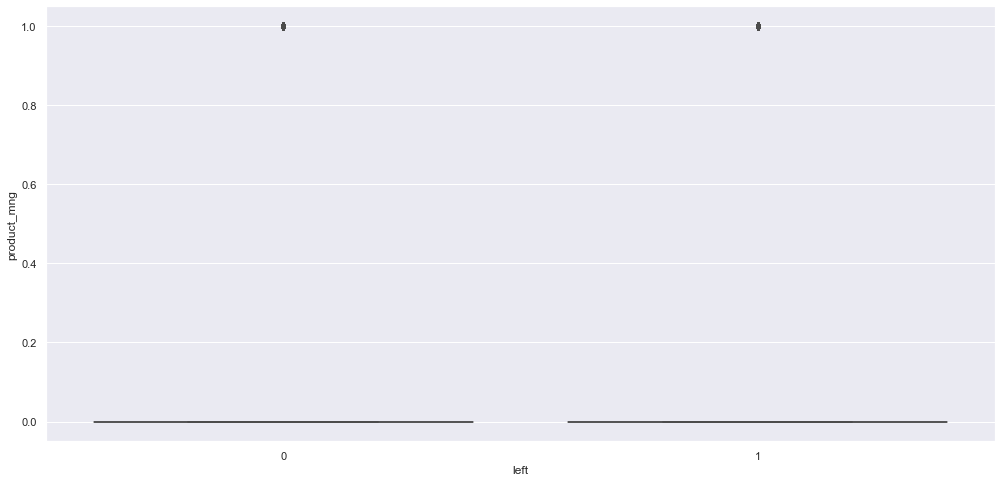

support: 


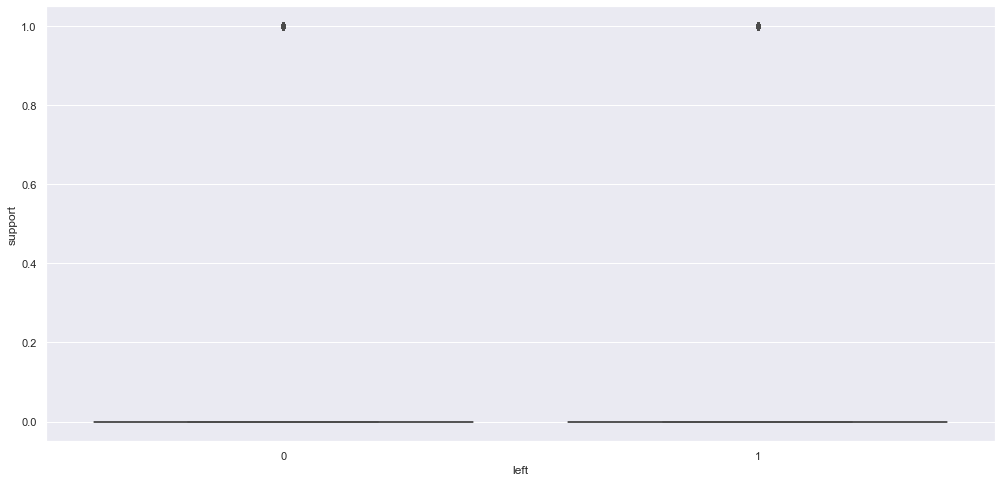

technical: 


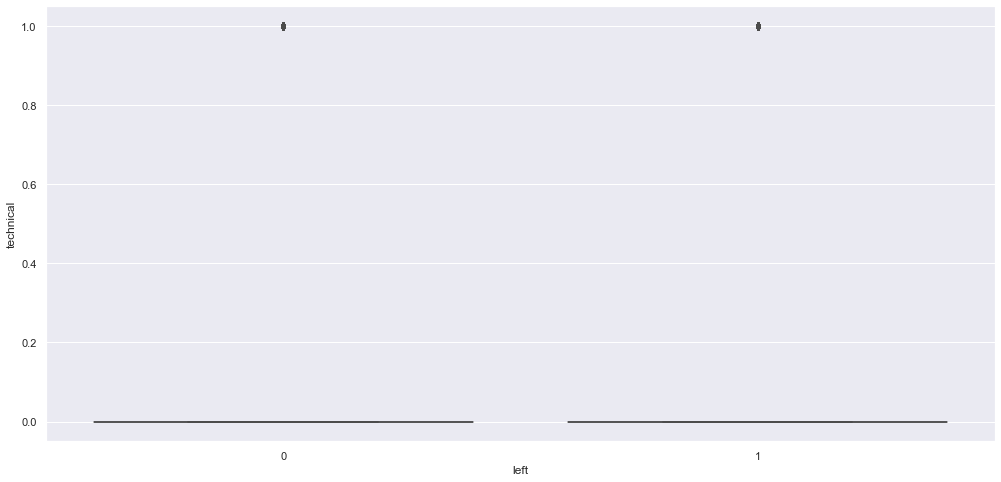

In [63]:
#Visualizing seeing all variables based on left status.

sns.set(rc = {'figure.figsize':(17,8)})

for predictor in predictors:
    print(predictor + ": ")
    sns.boxplot(data=hr_data, x='left', y=predictor)
    plt.show()

## Feature Selection

In [64]:
hr_tuning = hr_data.copy() #creating a new dataframe without messing with the original dataframe.

In [65]:
del hr_tuning['left'] #Removing the target variable from features.

In [66]:
for column in hr_tuning.columns[:-10]: #Removing dummy features unsuitable for feature selection
    hr_tuning[column] = (hr_tuning[column]-hr_tuning[column].mean())/hr_tuning[column].std()

In [67]:
del hr_tuning['management'] #For normalization.

In [68]:
#Logistic regression without interaction.
import statsmodels.api as sm
sm_model = sm.Logit(hr_data['left'], sm.add_constant(hr_tuning)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const                    9.081684e-58
satisfaction_level       0.000000e+00
last_evaluation          9.146045e-07
number_project           1.110876e-48
average_montly_hours     6.966708e-18
time_spend_company       1.562802e-65
Work_accident            1.935495e-65
promotion_last_5years    2.038401e-08
salary                   1.595432e-72
IT                       1.590665e-02
RandD                    8.229769e-01
accounting               6.682118e-04
hr                       5.656722e-07
marketing                1.028560e-03
product_mng              1.451725e-02
sales                    1.969500e-04
support                  2.793835e-05
technical                1.105668e-05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14981
Method:                           MLE   Df Model:                           17
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                  0.2171
Time:                        22:12:13   Log-Likelihood:                -6445.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.0658      0.129    -16.021      0.000      -2.319      -1.813
satisfaction_level       -1.0263      0.024    -42.183      0.000      -1.074      -0.979
last_evaluation           0.1251      0.025      4.909      0.000       0.075       0.175
number_project           -0.3841      0.026    -14.663      0.000      -0.435      -0.333
average_montly_hours      0.2216      0.026      8.615      0.000       0.171       0.272
time_spend_company        0.3861      0.023     17.097      0.000       0.342       0.430
Work_accident            -0.5384      0.032    -17.085      0.000      -0.600      -0.477
promotion_last_5years    -0.2088      0.037     -5.609      0.000      -0.282      -0.136
salary                   -0.4387      0.024    -18.011      0.000      -0.486      -0.391
IT                        0.3624      0.150      2.411      0.016       0.068       0.657
RandD                    -0.0379      0.169     -0.224      0.823      -0.370       0.294
accounting                0.5390      0.158      3.402      0.001       0.228       0.849
hr                        0.7893      0.158      5.003      0.000       0.480       1.099
marketing                 0.5183      0.158      3.283      0.001       0.209       0.828
product_mng               0.3836      0.157      2.444      0.015       0.076       0.691
sales                     0.5019      0.135      3.723      0.000       0.238       0.766
support                   0.5886      0.140      4.190      0.000       0.313       0.864
technical                 0.6076      0.138      4.395      0.000       0.337       0.878
=========================================================================================
"""

In [69]:
hr_tuning['Interaction (Time/Accident)'] = hr_tuning['Work_accident']*hr_tuning['time_spend_company']
hr_tuning.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,marketing,product_mng,sales,support,technical,Interaction (Time/Accident)
0,-0.936463,-1.087239,-1.462814,-0.882010,-0.341224,-0.411152,-0.147407,-0.933337,0,0,0,0,0,0,1,0,0,0.140295
1,0.752789,0.840679,0.971081,1.220382,1.713379,-0.411152,-0.147407,0.636071,0,0,0,0,0,0,1,0,0,-0.704459
2,-2.022412,0.957522,2.593677,1.420610,0.343644,-0.411152,-0.147407,0.636071,0,0,0,0,0,0,1,0,0,-0.141290
3,0.431027,0.899101,0.971081,0.439493,1.028511,-0.411152,-0.147407,-0.933337,0,0,0,0,0,0,1,0,0,-0.422874
4,-0.976684,-1.145661,-1.462814,-0.841965,-0.341224,-0.411152,-0.147407,-0.933337,0,0,0,0,0,0,1,0,0,0.140295


In [70]:
#WITH interaction

sm_model = sm.Logit(hr_data['left'], sm.add_constant(hr_tuning)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const                          6.848210e-57
satisfaction_level             0.000000e+00
last_evaluation                1.476760e-06
number_project                 1.016610e-48
average_montly_hours           1.464605e-17
time_spend_company             5.210418e-59
Work_accident                  5.891141e-60
promotion_last_5years          1.503593e-08
salary                         1.032760e-72
IT                             1.800564e-02
RandD                          8.056018e-01
accounting                     8.508961e-04
hr                             7.310355e-07
marketing                      1.158283e-03
product_mng                    1.689183e-02
sales                          2.457395e-04
support                        3.037659e-05
technical                      1.470568e-05
Interaction (Time/Accident)    6.414404e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                  0.2176
Time:                        22:12:13   Log-Likelihood:                -6441.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0553      0.129    -15.895      0.000      -2.309      -1.802
satisfaction_level             -1.0283      0.024    -42.176      0.000      -1.076      -0.981
last_evaluation                 0.1229      0.026      4.814      0.000       0.073       0.173
number_project                 -0.3848      0.026    -14.669      0.000      -0.436      -0.333
average_montly_hours            0.2197      0.026      8.530      0.000       0.169       0.270
time_spend_company              0.3765      0.023     16.198      0.000       0.331       0.422
Work_accident                  -0.5169      0.032    -16.332      0.000      -0.579      -0.455
promotion_last_5years          -0.2115      0.037     -5.661      0.000      -0.285      -0.138
salary                         -0.4399      0.024    -18.035      0.000      -0.488      -0.392
IT                              0.3565      0.151      2.366      0.018       0.061       0.652
RandD                          -0.0417      0.170     -0.246      0.806      -0.374       0.291
accounting                      0.5295      0.159      3.336      0.001       0.218       0.841
hr                              0.7829      0.158      4.953      0.000       0.473       1.093
marketing                       0.5142      0.158      3.249      0.001       0.204       0.824
product_mng                     0.3757      0.157      2.389      0.017       0.067       0.684
sales                           0.4958      0.135      3.667      0.000       0.231       0.761
support                         0.5875      0.141      4.171      0.000       0.311       0.864
technical                       0.6005      0.139      4.333      0.000       0.329       0.872
Interaction (Time/Accident)    -0.0747      0.027     -2.726      0.006      -0.128      -0.021
===============================================================================================
"""

In [71]:
#Mediation

sm_model = sm.Logit(hr_data['left'], sm.add_constant(hr_tuning['Work_accident'])).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const            0.000000e+00
Work_accident    3.380678e-69
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14997
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                 0.02650
Time:                        22:12:13   Log-Likelihood:                -8014.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                 7.132e-97
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2292      0.021    -59.496      0.000      -1.270      -1.189
Work_accident    -0.5106      0.029    -17.582      0.000      -0.568      -0.454
=================================================================================
"""

In [72]:
#Mediation

sm_model = sm.OLS(hr_data['time_spend_company'], sm.add_constant(hr_tuning['Work_accident'])).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

#We did not see a mediating effect.
#Third part is logistic.

const            0.000000
Work_accident    0.795121
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_spend_company   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06743
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.795
Time:                        22:12:13   Log-Likelihood:                -26960.
No. Observations:               14999   AIC:                         5.392e+04
Df Residuals:                   14997   BIC:                         5.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4982      0.012    293.409      0.000       3.475       3.522
Work_accident     0.0031      0.012      0.260      0.795      -0.020       0.026
==============================================================================
Omnibus:                     5639.537   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22784.905
Skew:                           1.852   Prob(JB):                         0.00
Kurtosis:                       7.768   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#Creating a list and looping through to format.
hr_list = list(hr_tuning.columns)

for item in hr_list:
    item = 'hr_list["'+item+'"]'

In [74]:
#Creating a logistic regression and conerting the coefficients to a list.
regr = linear_model.LogisticRegression()
regr.fit(hr_tuning[hr_list], hr["left"])
coef = regr.coef_[0].tolist()

In [75]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(hr_list,coef):
    y=str(y)
    print(x+": "+y)

satisfaction_level: -1.0273574706248927
last_evaluation: 0.12248811190623157
number_project: -0.38401317700437443
average_montly_hours: 0.2195066647479054
time_spend_company: 0.37508401022165033
Work_accident: -0.5162115977461842
promotion_last_5years: -0.2123885695515524
salary: -0.44065456576067497
IT: 0.2954135102460333
RandD: -0.1001766745587766
accounting: 0.4663268754641599
hr: 0.7176749894008032
marketing: 0.4513492864079386
product_mng: 0.31379637248402015
sales: 0.43549157760355056
support: 0.5259983840014197
technical: 0.5392183293034523
Interaction (Time/Accident): -0.07483423948254998


In [76]:
hr_tuning[column].mean()/hr_tuning[column].std()

7.151008752265537e-15

In [77]:
std_val = np.max(np.abs(coef))/np.std(np.abs(coef))
std_val

4.562032207935168

In [84]:
log_important_features = []
log_coef_list = []

for coe,f_name in zip(coef,hr_list):
    if abs(coe) > std_val/10.5:
        log_important_features.append(f_name)
        log_coef_list.append(abs(coe))
        
print(log_important_features) #Put this into a df and sort it that way. #pd.DataFrame(dictionary) #Find a significance factor, special t test to prevent too many t tests.
print(log_coef_list)

len(log_important_features) == len(log_coef_list)

['satisfaction_level', 'Work_accident', 'salary', 'accounting', 'hr', 'marketing', 'sales', 'support', 'technical']
[1.0273574706248927, 0.5162115977461842, 0.44065456576067497, 0.4663268754641599, 0.7176749894008032, 0.4513492864079386, 0.43549157760355056, 0.5259983840014197, 0.5392183293034523]


True

In [79]:
log_important_df = pd.DataFrame(list(zip(log_important_features, log_coef_list)),
               columns =['Important Features', 'Coefficient'])
log_important_df

,Important Features,Coefficient
0,satisfaction_level,1.027357
1,Work_accident,0.516212
2,salary,0.440655
3,accounting,0.466327
4,hr,0.717675
5,marketing,0.451349
6,sales,0.435492
7,support,0.525998
8,technical,0.539218


In [80]:
#
#Repeating the same thing for Ridge.
hr_tuning = hr_data.copy() #creating a new dataframe without messing with the original dataframe.
del hr_tuning['left']

for column in hr_tuning.columns[:-10]:
    hr_tuning[column] = (hr_tuning[column]-hr_tuning[column].mean())/hr_tuning[column].std()
    
hr_tuning['Interaction (Time/Accident)'] = hr_tuning['Work_accident']*hr_tuning['time_spend_company']
del hr_tuning['management']

hr_list = list(hr_tuning.columns)

for item in hr_list:
    item = 'hr_list["'+item+'"]'
    
#Creating a ridge regression and conerting the coefficients to a list.
rig = Ridge(alpha=1.0)
rig.fit(hr_tuning[hr_list], hr["left"])
rig.score(hr_tuning[hr_list], hr["left"])
#coef = regr.coef_[0].tolist()

#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(hr_list,rig.coef_):
    y=str(y)
    print(x + ": " + y)

satisfaction_level: -0.15986455210884892
last_evaluation: 0.01407920313852013
number_project: -0.04212881010188136
average_montly_hours: 0.03132308716461685
time_spend_company: 0.05542391036109279
Work_accident: -0.05466373491413619
promotion_last_5years: -0.016171592195739725
salary: -0.05755709032432665
IT: 0.03879116658923225
RandD: -0.009980866022259314
accounting: 0.06265464269767992
hr: 0.09926204317898686
marketing: 0.06194763834340455
product_mng: 0.03936787092789331
sales: 0.058834675959647996
support: 0.07120037220378919
technical: 0.07092371359364867
Interaction (Time/Accident): -0.01708842812850672


In [87]:
#Ridge regression
rig_important_features = []
rig_coef_list = []

for coe,f_name in zip(rig.coef_,hr_list):
    if abs(coe) > std_val/80:
        rig_important_features.append(f_name)
        rig_coef_list.append(abs(coe))
        
print(rig_important_features) #Put this into a df and sort it that way. #pd.DataFrame(dictionary) #Find a significance factor, special t test to prevent too many t tests.
print(rig_coef_list)

len(rig_important_features) == len(rig_coef_list)

['satisfaction_level', 'salary', 'accounting', 'hr', 'marketing', 'sales', 'support', 'technical']
[0.15986455210884892, 0.05755709032432665, 0.06265464269767992, 0.09926204317898686, 0.06194763834340455, 0.058834675959647996, 0.07120037220378919, 0.07092371359364867]


True

In [82]:
#Displaying the coefficients
important_df = pd.DataFrame(list(zip(rig_important_features, rig_coef_list)),
               columns =['Important Features', 'Coefficient'])
important_df

,Important Features,Coefficient
0,satisfaction_level,0.159865
1,salary,0.057557
2,accounting,0.062655
3,hr,0.099262
4,marketing,0.061948
5,sales,0.058835
6,support,0.071200
7,technical,0.070924
